# Mammographic Mass Classification


In [19]:
## Mammography is the most effective method for breast cancer screening available today. 
## The classification of mammographic masses will be based on benign or malignant.
## Benign is when the tumor doesn’t invade other tissues whereas malignant does spread
## A couple of Classification algorithms will be tested here: 
## SVM, Logistic Regression, Decision Trees, Random Forest, Naive Bayes, Artificial Neural Network ..
##

# IMPORT THE NECESSSARY PACKEGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import svm
from sklearn import linear_model

In [107]:
# Input dataset into a dataframe

input_file = 'mammographic_masses.data.txt'
masses_data = pd.read_csv(input_file, names = ['BI-RADS','Age','Shape','Margin','Density','Severity'], usecols = ['Age','Shape','Margin','Density','Severity'],na_values='?')
masses_data.head(10)

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1
5,65.0,1.0,NaN,3.0,0
6,70.0,NaN,NaN,3.0,0
7,42.0,1.0,NaN,3.0,0
8,57.0,1.0,5.0,3.0,1
9,60.0,NaN,5.0,1.0,1


In [21]:
# Get a description about the data

masses_data.describe()

,Age,Shape,Margin,Density,Severity
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [22]:
# Drop NAN values from our dataframe

masses_data = masses_data.dropna()

masses_data.describe()

,Age,Shape,Margin,Density,Severity
count,831.000000,831.000000,831.000000,831.000000,831.000000
mean,55.777377,2.783394,2.814681,2.915764,0.484958
std,14.663528,1.242331,1.566771,0.350737,0.500075
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,46.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [23]:
# Create two vectors: X containing input features ( first four columns ) 
#                     Y containing target variable ('the severity' column)

features = list(masses_data.columns[:4])
X = masses_data[features].values
print(X)

labels = list(masses_data.columns[4:])
y = masses_data[labels].values
y = y.ravel()
print(y)


[[67.  3.  5.  3.]
 [58.  4.  5.  3.]
 [28.  1.  1.  3.]
 ...
 [64.  4.  5.  3.]
 [66.  4.  5.  3.]
 [62.  3.  3.  3.]]
[1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1
 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 

In [24]:
# Scale the input features to normalise the data
# The data transformed will have a mean value of 0 and standard deviation of 1

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.76580356  0.17445989  1.39563127  0.24031298]
 [ 0.15166622  0.97988304  1.39563127  0.24031298]
 [-1.89545824 -1.43638642 -1.15892729  0.24031298]
 ...
 [ 0.56109111  0.97988304  1.39563127  0.24031298]
 [ 0.69756608  0.97988304  1.39563127  0.24031298]
 [ 0.42461615  0.17445989  0.11835199  0.24031298]]


In [25]:
# Create training and testing datasets

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0) 

## Decision Tree Classifier

In [112]:
# Build the model Decision Tree classifier using the trainning set

dtc = tree.DecisionTreeClassifier(random_state=0)
dtc = dtc.fit(X_train, y_train)

# then predict the values of the features test set

y_pred = dtc.predict(X_test)
print(y_pred)

# Calculate the accuracy of the prediction on test samples
# Not bad as result: 77%
dtc.score(X_test, y_test)

[1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0
 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0
 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0]


0.7740384615384616

In [113]:
# ROC curve

from sklearn import metrics

def createROC(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    plt.show()
    

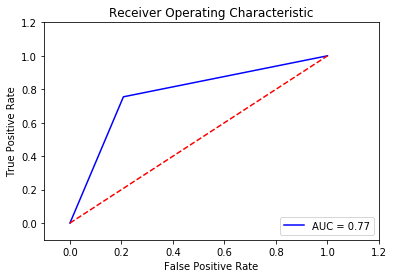

In [114]:
createROC(y_test, y_pred)

In [125]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()

# Get the dot graph of our decision tree
tree.export_graphviz(dtc, out_file=dot_data, 
                     feature_names=features,
                     filled=True, rounded=True,
                     special_characters=True, max_depth=15)

# Convert this dot graph into an image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# make sure you have graphviz installed and set in path
Image(graph.create_png())


InvocationException: GraphViz's executables not found

In [33]:
# K-Fold Cross Validation

dtc = tree.DecisionTreeClassifier(random_state=0)
scores = model_selection.cross_val_score(dtc, X, y, cv=10)
print(scores)
print(scores.mean())


[0.71428571 0.75       0.72619048 0.73493976 0.78313253 0.69879518
 0.72289157 0.75903614 0.7804878  0.68292683]
0.7352686005345423


 ## Random Forest Classifier

In [34]:
# Build the model of random forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
scores = model_selection.cross_val_score(rfc, X, y, cv=10)

print(scores)
print(scores.mean())

[0.69047619 0.75       0.80952381 0.72289157 0.84337349 0.71084337
 0.78313253 0.72289157 0.75609756 0.67073171]
0.7459961798413165


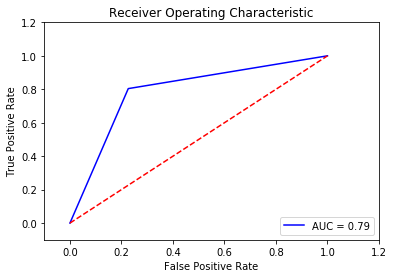

In [36]:
createROC(y_test, y_pred)

## SVM

### 1 - Linear Kernel 

In [45]:
from sklearn import svm

# Build the model svm

svc = svm.SVC(kernel='linear', C=1, gamma='scale')
svc = svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

scores = model_selection.cross_val_score(svc, X, y, cv=10)
print(scores)
print(scores.mean())


[0.71428571 0.77380952 0.85714286 0.80722892 0.84337349 0.71084337
 0.79518072 0.80722892 0.90243902 0.74390244]
0.7955434980339476


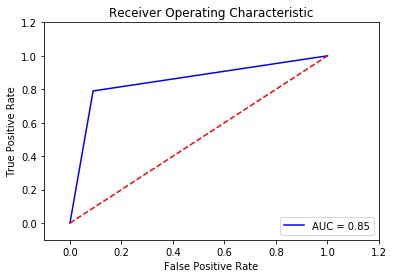

In [39]:
createROC(y_pred, y_test)

### 2 - Poly Kernel

In [41]:
# Build the model svm

svc = svm.SVC(kernel='poly', C=1, gamma='scale')
svc = svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

scores = model_selection.cross_val_score(svc, X, y, cv=10)
print(scores)
print(scores.mean())

[0.76190476 0.77380952 0.86904762 0.79518072 0.84337349 0.71084337
 0.75903614 0.78313253 0.86585366 0.74390244]
0.7906084267383122


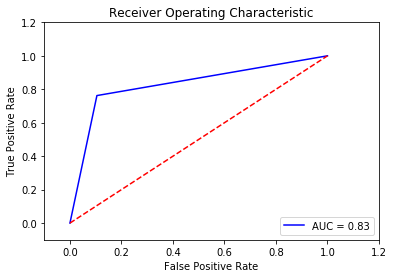

In [42]:
createROC(y_pred, y_test)

### 3 - RBF Kernel

In [44]:
# Build the model svm

svc = svm.SVC(kernel='rbf', C=1, gamma='scale')
svc = svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

scores = model_selection.cross_val_score(svc, X, y, cv=10)
print(scores)
print(scores.mean())

[0.76190476 0.79761905 0.85714286 0.80722892 0.86746988 0.73493976
 0.77108434 0.78313253 0.86585366 0.76829268]
0.8014668429816828


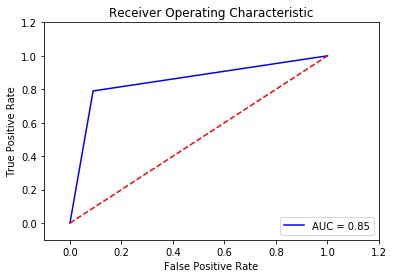

In [46]:
createROC(y_pred, y_test)

### 4 - Sigmoid Kernel

In [49]:
# Build the model svm

svc = svm.SVC(kernel='sigmoid', C=1, gamma='scale')
svc = svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

scores = model_selection.cross_val_score(svc, X, y, cv=10)
print(scores)
print(scores.mean())

[0.67857143 0.67857143 0.75       0.72289157 0.74698795 0.72289157
 0.73493976 0.78313253 0.70731707 0.75609756]
0.7281400864783174


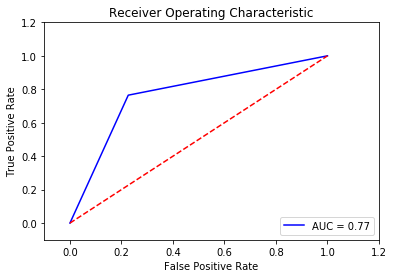

In [51]:
createROC(y_pred, y_test)

 ## Naive Bayes

In [52]:
# Build the naive bayes model

from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

nb = MultinomialNB()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
nb.score(X_test, y_test)

scores = model_selection.cross_val_score(nb, X, y, cv=10)
print(scores)
print(scores.mean())


[0.73809524 0.76190476 0.80952381 0.8313253  0.8313253  0.75903614
 0.71084337 0.75903614 0.91463415 0.70731707]
0.7823041294096245


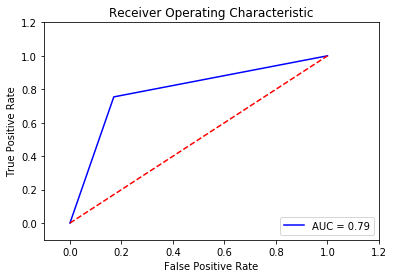

In [53]:
createROC(y_pred, y_test)

## Logistic Regression

In [55]:
# Build the logistic regression model

from sklearn import linear_model

lr = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
lr = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

scores = model_selection.cross_val_score(lr, X, y, cv=10)
print(scores)
print(scores.mean())


[0.75       0.76190476 0.86904762 0.81927711 0.8313253  0.72289157
 0.78313253 0.8313253  0.8902439  0.79268293]
0.805183101744959


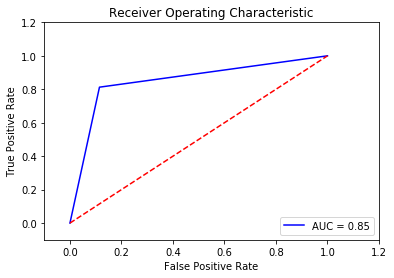

In [56]:
createROC(y_pred, y_test)

## Artificial Neural Network

In [70]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier

In [104]:
ann = Sequential()

ann.add(Dense(64, input_dim=4, kernel_initializer='normal', activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(32, kernel_initializer='normal', activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(16, kernel_initializer='normal', activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(8, kernel_initializer='normal', activation='relu'))
ann.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = ann.fit(X_train, y_train, batch_size=10, epochs=100, verbose=2)

Epoch 1/100
 - 2s - loss: 0.6928 - acc: 0.5522
Epoch 2/100
 - 0s - loss: 0.6844 - acc: 0.7127
Epoch 3/100
 - 0s - loss: 0.6363 - acc: 0.7769
Epoch 4/100
 - 0s - loss: 0.5627 - acc: 0.7689
Epoch 5/100
 - 0s - loss: 0.5276 - acc: 0.7737
Epoch 6/100
 - 0s - loss: 0.5152 - acc: 0.7801
Epoch 7/100
 - 0s - loss: 0.4936 - acc: 0.7801
Epoch 8/100
 - 0s - loss: 0.4962 - acc: 0.7865
Epoch 9/100
 - 0s - loss: 0.4890 - acc: 0.7737
Epoch 10/100
 - 0s - loss: 0.4938 - acc: 0.7945
Epoch 11/100
 - 0s - loss: 0.5172 - acc: 0.7737
Epoch 12/100
 - 0s - loss: 0.5038 - acc: 0.7817
Epoch 13/100
 - 0s - loss: 0.5096 - acc: 0.7673
Epoch 14/100
 - 0s - loss: 0.4989 - acc: 0.7753
Epoch 15/100
 - 0s - loss: 0.5065 - acc: 0.7849
Epoch 16/100
 - 0s - loss: 0.4895 - acc: 0.7849
Epoch 17/100
 - 0s - loss: 0.5001 - acc: 0.7785
Epoch 18/100
 - 0s - loss: 0.4888 - acc: 0.7785
Epoch 19/100
 - 0s - loss: 0.4918 - acc: 0.7849
Epoch 20/100
 - 0s - loss: 0.4893 - acc: 0.7913
Epoch 21/100
 - 0s - loss: 0.4883 - acc: 0.7801
E

In [105]:
score = ann.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.4653801184434157
Test Accuracy: 0.8413461538461539


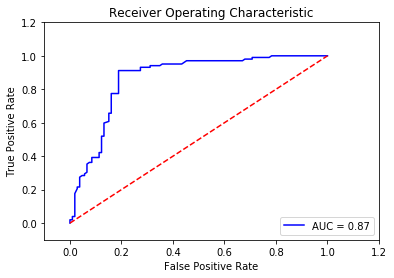

In [106]:
y_pred = ann.predict(X_test)
createROC(y_test, y_pred)